# Ligand-based screening with neural networks
## 这一块后面是有预测PIC50的功能的，主要是预测生成新的 smiles 序列，然后用神经网络来预测其对应的 pIC50 值。

## 目标 ¶

近年来，机器学习和深度学习在药物研究中的应用在解决药物发现中的各种问题上显示出有希望的结果。在本讲义中，我们将熟悉神经网络的基础知识。我们将学习如何构建一个简单的两层神经网络，并在 ChEMBL 数据的一个子集上对其进行训练，以预测化合物对 EGFR（感兴趣的目标）的 pIC50 值。此外，我们从外部未标记的数据集中选择了三种化合物，这些化合物被预测对该激酶活性最高。

###  内容在理论中 ¶

-  生物背景
  -  EGFR 激酶
  - 复合活动指标
  -  分子编码
-  神经网络
  - 什么是神经网络？
  -  激活函数
  -  损失函数
- 训练神经网络
-  Keras 工作流程
- 神经网络的优势和应用

###  内容在实用篇中

-  数据准备
-  定义神经网络
-  训练模型
- 评估与预测在测试集上
  -  散点图
- 预测外部/未标记数据
  - 选择前 3 个化合物

## 理论 ¶

###  生物背景 ¶

####  EGFR 激酶

- 表皮生长因子受体（EGFR）是一种存在于细胞膜上的跨膜蛋白/受体。它是 ErbB 受体家族的成员。
- EGFR 在控制正常细胞生长、细胞凋亡和其他细胞功能中起着重要作用。
- 它通过配体与其细胞外域结合而被激活，激活后 EGFR 从非活性单体形式转变为活性同源二聚体。
- EGFR 受体在各种肿瘤或癌症中上调，因此 EGFR 抑制是一种可能阻止癌细胞生长的生物治疗方法。

#### 复合活动测量指标

- IC50 是药物的半数最大抑制浓度，表示需要多少药物才能将生物过程抑制一半。
- pIC50 是 IC50 值的负对数。它比 IC50 值更容易理解，是衡量化合物活性的常用指标（详见 Talktorial T001 以获取更多详细信息）。

####  分子编码

对于机器学习算法，分子需要转换为机器可读的格式，例如特征列表。在这个笔记本中，使用了分子指纹。

分子指纹通过位串编码化学结构和分子特征，其中每个位置上的“1”代表特征的存在，“0”代表特征的缺失。常用的指纹之一是分子访问系统指纹（MACCS Keys），它是一种 166 位的结构键描述符，其中每个位都与一个 SMARTS 模式相关联，用于编码特定的亚结构（详见 Talktorial T004 以获取更多详细信息）。

###  神经网络

#### 什么是神经网络？

神经网络，也称为人工神经网络（ANNs），是机器学习算法的一个子集。神经网络的架构和名称灵感来源于人脑，模仿了生物神经元之间传递信号的方式。

## 理论 ¶

###  生物背景 ¶

####  EGFR 激酶

- 表皮生长因子受体（EGFR）是一种存在于细胞膜上的跨膜蛋白/受体。它是 ErbB 受体家族的成员。
- EGFR 在控制正常细胞生长、细胞凋亡和其他细胞功能中起着重要作用。
- 它通过配体与其细胞外域结合而被激活，激活后 EGFR 从非活性单体形式转变为活性同源二聚体。
- EGFR 受体在各种肿瘤或癌症中上调，因此 EGFR 抑制是一种可能阻止癌细胞生长的生物治疗方法。

#### 复合活动测量指标

- IC50 是药物的半数最大抑制浓度，表示需要多少药物才能将生物过程抑制一半。
- pIC50 是 IC50 值的负对数。它比 IC50 值更容易理解，是衡量化合物活性的常用指标（详见 Talktorial T001 以获取更多详细信息）。

####  分子编码

对于机器学习算法，分子需要转换为机器可读的格式，例如特征列表。在这个笔记本中，使用了分子指纹。

分子指纹通过位串编码化学结构和分子特征，其中每个位置上的“1”代表特征的存在，“0”代表特征的缺失。常用的指纹之一是分子访问系统指纹（MACCS Keys），它是一种 166 位的结构键描述符，其中每个位都与一个 SMARTS 模式相关联，用于编码特定的亚结构（详见 Talktorial T004 以获取更多详细信息）。

###  神经网络

#### 什么是神经网络？

神经网络，也称为人工神经网络（ANNs），是机器学习算法的一个子集。神经网络的架构和名称灵感来源于人脑，模仿了生物神经元之间传递信号的方式。

每个输入神经元 xi 乘以权重 wi 。在图 2 中，我们有 (x1,x2,x3) 和 (w1,w2,w3) 。权重的值决定了输入神经元对下一层神经元的 影响。然后将乘积相加。还添加了一个额外的值，称为偏差，它允许移动激活函数。这个新值成为隐藏神经元的值。数学上，我们有：
$$
h=(w1∗x1+w2∗x2+w3∗x3)+b=∑i3wi∗xi+b
$$
激活函数，在下一节中将有更详细的讨论，随后应用于隐藏神经元以确定神经元值是否应该被激活。激活的神经元将数据传输到下一层的神经元。通过这种方式，数据在网络中传播，这被称为正向传播。

神经网络中的权重和偏差被称为可学习参数。在训练模型以获得良好性能时，它们会被调整。

####  激活函数 ¶

**什么是激活函数？**

激活函数调节通过神经网络的信量。此函数应用于每个神经元，并决定神经元是否应该被激活。它作为输入供给当前神经元及其输出传递到下一层的“门”作用，如图所示。



**激活函数的类型**

有许多激活函数类型，但我们只讨论下面实际部分中使用的两种。更多信息，请参阅补充部分和参考文献。大多数神经网络在隐藏层中使用非线性激活函数来学习复杂特征并适应各种数据。

1. 修正线性单元（ReLU）

- 它呈现为： f(x)=max{0,x} 。
- 如图所示，ReLU 输出 x ，如果 x 为正，否则输出 0 。ReLU 的范围为 [0,+∞) 。
- 其中一个原因是因为它的稀疏性：只有少数神经元会被激活，从而使激活变得稀疏且高效。
- 已成为许多类型神经网络的默认激活函数，因为它使得模型的训练成本更低，并且模型通常能取得更好的性能。
- ReLU 的一个可能缺点是所谓的“死亡 ReLU”问题，其中神经元对所有输入都处于不活跃状态，这是一种梯度消失问题。

1. 线性激活函数

- 线性激活函数的形式为： a(x)=x 。
- 这是回归设置中最合适的激活函数，因为输出没有约束。

####  损失函数 ¶

当训练神经网络时，目标是优化预测误差，即真实值与模型预测值之间的差异。预测误差可以写成函数，称为目标函数、代价函数或损失函数。因此，目标是因此最小化损失函数，换句话说，找到局部最小值。损失函数是训练神经网络的重要组件之一。有关损失函数的更多详细信息，请参阅博客文章：训练深度学习神经网络的损失与损失函数。在回归任务中常用的两个损失函数是

1. 均方误差（MSE）：正如其名所示，这种损失是通过计算真实值和预测值之间差的平方的平均值来计算的。
2. 平均绝对误差（MAE）：损失通过计算真实值与预测值之间绝对差的平均值来计算。

### 训练神经网络 ¶

当开始使用神经网络时，参数，即权重和偏差，是随机初始化的。然后输入被送入网络并产生输出。然而，相应的输出很可能与真实值非常不同。换句话说，预测误差将非常糟糕：损失函数远未达到最小。因此，必须优化初始参数以获得更好的预测。

为此，我们需要最小化损失函数。找到这样一个最小值的有效方法是使用梯度下降算法。这种优化方案是迭代的，并使用损失函数的导数（或多元情况下的梯度）和学习率。算法背后的主要思想是跟随函数的最陡方向，这是通过梯度获得的，并通过学习率管理每一步的长度。后者通常被称为超参数，可以通过交叉验证进行调整（更多细节将在未来的教程中介绍）。

在训练神经网络时，使用反向传播是非常常见的，这是一种利用链式法则进行微分来高效获取梯度的方法。

总结来说，每次网络正向传播后，反向传播都会进行反向传播，同时调整模型的参数以最小化损失函数。

 **计算成本**

如果所使用的数据集非常大，计算损失函数的梯度可能会非常昂贵。解决这个问题的方法是一次使用训练数据的一个样本或小批量，这被称为随机梯度下降（SGD）或小批量随机梯度下降。

###  Keras 工作流程 ¶

Keras 是一个开源的机器学习库，更具体地说，是神经网络。它的 API 运行在广为人知的 TensorFlow 深度学习平台之上。

以下，我们展示了一个使用 keras 训练神经网络的常见工作流程。

- 准备数据 − 对于任何机器学习算法，我们首先从数据中处理、过滤和选择所需的信息。然后，将数据分为训练集和测试集。测试数据用于评估算法的预测并交叉检查学习过程的效率。
- 定义模型 - 在 keras 中，每个 ANN 都由 keras 模型表示。Keras 提供了一种创建模型的方法，称为序列模型。层按顺序排列，数据按照给定顺序从一层流向另一层，直到数据最终到达输出层。ANN 中的每一层都可以由一个 keras 层表示。
- 编译模型 − 编译是创建模型的最后一步。一旦编译完成，我们就可以进入训练阶段。在学习阶段，需要一个损失函数和一个优化器来定义预测误差并分别最小化它。在本教程的实践部分，我们使用均方误差作为损失函数，并使用 adam 优化器，这是一种流行的梯度下降版本，已在广泛的问题中显示出良好的效果。
- 适配模型 - 实际的学习过程将在本阶段使用训练数据集进行。我们可以调用需要多个参数的 fit()方法，例如 x 输入数据， y 目标数据，批量大小，训练轮数等。一个训练轮次是指整个数据集通过神经网络正向和反向传播一次。
- 评估模型 - 我们可以通过使用 evaluate()方法，观察测试数据预测值与真实值之间的损失函数来评估模型。
  - 散点图是可视化模型评估的一种常见且简单的方法。它们绘制预测值与真实值之间的关系。如果拟合完美，我们应该看到 y=x 线，这意味着预测值与真实值完全一致。
- 预测外部/未标记数据 - 我们使用 predict()方法基于训练模型对外部数据集进行预测。

### 神经网络的优势和应用

**神经网络的优势**

- 有机学习：神经网络具有通过提取输入数据中存在的关键特征来学习的能力。
- 非线性数据处理：它们具有学习和建模非线性及复杂关系的能力。
- 训练时间操作：在训练时间内，可以通过并行化来降低计算成本。**应用神经网络**

神经网络在计算机辅助药物设计中有各种应用，例如：

- 药物设计与发现
- 生物标志物鉴定和/或分类
- 各种癌症检测类型
-  模式识别

In [1]:
from pathlib import Path
from warnings import filterwarnings

# Silence some expected warnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys, Draw, rdFingerprintGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

# Neural network specific libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

%matplotlib inline

2024-10-08 00:47:08.001395: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from pathlib import Path
import os

# 获取当前工作目录
HERE = Path(os.getcwd())
DATA = HERE / 'data'
if not DATA.exists():
    DATA.mkdir(parents=True, exist_ok=True)
print(DATA)


/Users/wangyang/Desktop/Breast_cancer_brain_metastasis/wang_Gene/AIDD/05_Ligand-based_screening_Neural_networks/data


### 数据准备 ¶

让我们加载 ChEMBL 中 EGFR 的子集数据。DataFrame 中的重要列包括：

- CHEMBL-ID
- SMILES 字符串对应的化合物
-  测量亲和力：pIC50

In [3]:
# Load data
df = pd.read_csv(
    HERE / "../03_Molecular_filtration_of_unwanted_substructures/data/data_ubstructures_matches.csv"
)
df = df.reset_index(drop=True)

In [4]:
# Check the dimension and missing value of the data
print("Shape of dataframe : ", df.shape)
df.info()

Shape of dataframe :  (1738, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  1738 non-null   object 
 1   IC50                1738 non-null   float64
 2   units               1738 non-null   object 
 3   smiles              1738 non-null   object 
 4   pIC50               1738 non-null   float64
 5   ro5_fulfilled       1738 non-null   bool   
 6   ROMol               1738 non-null   object 
dtypes: bool(1), float64(2), object(4)
memory usage: 83.3+ KB


In [6]:
# Look at head
df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50,ro5_fulfilled,ROMol
0,CHEMBL3685304,0.010,nM,C[C@@H](Nc1ncnc2c(C(N)=O)cccc12)c1cccc(NC(=O)c...,11.000000,True,<rdkit.Chem.rdchem.Mol object at 0x7fd465e18100>
1,CHEMBL4443279,0.012,nM,Fc1ccccc1Oc1nc(Nc2ccc(-c3nnn[nH]3)cc2)ncc1Cl,10.920819,True,<rdkit.Chem.rdchem.Mol object at 0x7fd465e18fa0>
2,CHEMBL4462759,0.012,nM,COc1ccc(Oc2nc(Nc3ccc(-c4nnn[nH]4)cc3)ncc2Cl)cc1,10.920819,True,<rdkit.Chem.rdchem.Mol object at 0x7fd465e181c0>
3,CHEMBL4476212,0.012,nM,Fc1ccc(Oc2nc(Nc3ccc(-c4nnn[nH]4)cc3)ncc2Cl)cc1,10.920819,True,<rdkit.Chem.rdchem.Mol object at 0x7fd465e18580>
4,CHEMBL3675462,0.030,nM,C[C@@H](Nc1ncnc2c(C(N)=O)cccc12)c1cccc(NC(=O)c...,10.522879,True,<rdkit.Chem.rdchem.Mol object at 0x7fd465e18ee0>


In [8]:
# Keep necessary columns
chembl_df = df[["smiles", "pIC50"]]
chembl_df.head()

,smiles,pIC50
0,C[C@@H](Nc1ncnc2c(C(N)=O)cccc12)c1cccc(NC(=O)c...,11.000000
1,Fc1ccccc1Oc1nc(Nc2ccc(-c3nnn[nH]3)cc2)ncc1Cl,10.920819
2,COc1ccc(Oc2nc(Nc3ccc(-c4nnn[nH]4)cc3)ncc2Cl)cc1,10.920819
3,Fc1ccc(Oc2nc(Nc3ccc(-c4nnn[nH]4)cc3)ncc2Cl)cc1,10.920819
4,C[C@@H](Nc1ncnc2c(C(N)=O)cccc12)c1cccc(NC(=O)c...,10.522879


 分子编码

我们将 SMILES 字符串转换为数值数据以应用神经网络。 smiles_to_fp 函数，该函数从 SMILES 生成指纹。默认编码是 166 位的 MACCS 键（有关分子编码的更多信息

In [9]:
def smiles_to_fp(smiles, method="maccs", n_bits=2048):
    """
    Encode a molecule from a SMILES string into a fingerprint.

    Parameters
    ----------
    smiles : str
        The SMILES string defining the molecule.

    method : str
        The type of fingerprint to use. Default is MACCS keys.

    n_bits : int
        The length of the fingerprint.

    Returns
    -------
    array
        The fingerprint array.
    """

    # Convert smiles to RDKit mol object
    mol = Chem.MolFromSmiles(smiles)

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=n_bits)
        return np.array(fpg.GetCountFingerprint(mol))
    if method == "morgan3":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=n_bits)
        return np.array(fpg.GetCountFingerprint(mol))
    else:
        print(f"Warning: Wrong method specified: {method}." " Default will be used instead.")
        return np.array(MACCSkeys.GenMACCSKeys(mol))

将所有 SMILES 字符串转换为 MACCS 指纹。

In [11]:
chembl_df["fingerprints_df"] = chembl_df["smiles"].apply(smiles_to_fp)

# Look at head
print("Shape of dataframe:", chembl_df.shape)
chembl_df.head(3)
# NBVAL_CHECK_OUTPUT

Shape of dataframe: (1738, 3)


,smiles,pIC50,fingerprints_df
0,C[C@@H](Nc1ncnc2c(C(N)=O)cccc12)c1cccc(NC(=O)c...,11.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Fc1ccccc1Oc1nc(Nc2ccc(-c3nnn[nH]3)cc2)ncc1Cl,10.920819,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,COc1ccc(Oc2nc(Nc3ccc(-c4nnn[nH]4)cc3)ncc2Cl)cc1,10.920819,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


接下来，我们定义 
x
 ，特征，以及 
y
 ，用于训练模型的目标数据。在我们的案例中，特征是位向量，目标值是分子的 pIC50 值。

我们使用 scikit-learn 库中的 train_test_split 将数据分为 70%的训练数据和 30%的测试数据。

In [12]:
# Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(
    chembl_df["fingerprints_df"], chembl_df[["pIC50"]], test_size=0.3, random_state=42
)

# Print the shape of training and testing data
print("Shape of training data:", x_train.shape)
print("Shape of test data:", x_test.shape)
# NBVAL_CHECK_OUTPUT

Shape of training data: (1216,)
Shape of test data: (522,)


定义神经网络 ¶
A keras 模型通过指定隐藏层中的神经元数量和激活函数作为参数来定义。为了我们的目的，我们定义了一个具有两个隐藏层的模型。我们在隐藏层中使用 ReLU，在输出层上使用线性函数，因为目标是预测 pIC50 值。最后，我们使用均方误差作为损失参数和 adam 作为优化器来编译模型。

In [13]:
def neural_network_model(hidden1, hidden2):
    """
    Creating a neural network from two hidden layers
    using ReLU as activation function in the two hidden layers
    and a linear activation in the output layer.

    Parameters
    ----------
    hidden1 : int
        Number of neurons in first hidden layer.

    hidden2: int
        Number of neurons in second hidden layer.

    Returns
    -------
    model
        Fully connected neural network model with two hidden layers.
    """

    model = Sequential()
    # First hidden layer
    model.add(Dense(hidden1, activation="relu", name="layer1"))
    # Second hidden layer
    model.add(Dense(hidden2, activation="relu", name="layer2"))
    # Output layer
    model.add(Dense(1, activation="linear", name="layer3"))

    # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse", "mae"])
    return model

训练模型 ¶
我们尝试不同的迷你批量大小并绘制相应的损失图。

In [14]:
# Neural network parameters
batch_sizes = [16, 32, 64]
nb_epoch = 50
layer1_size = 64
layer2_size = 32

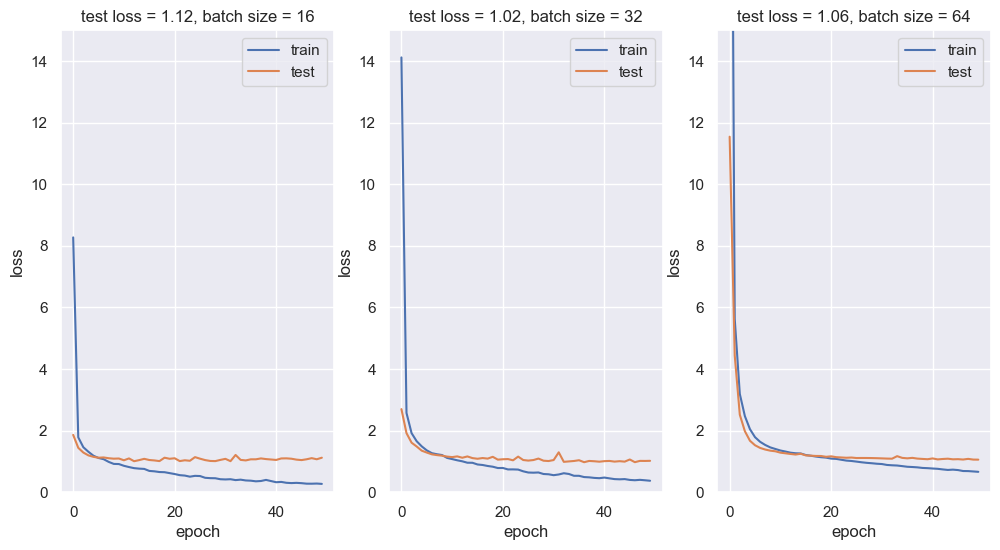

In [15]:
# Plot
fig = plt.figure(figsize=(12, 6))
sns.set(color_codes=True)
for index, batch in enumerate(batch_sizes):
    fig.add_subplot(1, len(batch_sizes), index + 1)
    model = neural_network_model(layer1_size, layer2_size)

    # Fit model on x_train, y_train data
    history = model.fit(
        np.array(list((x_train))).astype(float),
        y_train.values,
        batch_size=batch,
        validation_data=(np.array(list((x_test))).astype(float), y_test.values),
        verbose=0,
        epochs=nb_epoch,
    )
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend(["train", "test"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.ylim((0, 15))
    plt.title(
        f"test loss = {history.history['val_loss'][nb_epoch-1]:.2f}, " f"batch size = {batch}"
    )
plt.show()

从上面的损失图中可以看出，批量大小为 64 似乎能给出最佳性能。

A ModelCheckpoint 回调用于在某个间隔内保存最佳模型/权重（在检查点文件中），以便模型/权重可以保存为当前状态或稍后加载以继续从保存的状态进行训练。

现在，我们以 64 个批次的规模训练模型（因为如上图所示，它具有最低的测试损失），并将给出最佳性能的权重保存在文件 best_weights.hdf5 中。

In [16]:
# Save the trained model
filepath = DATA / "best_weights.hdf5"
checkpoint = ModelCheckpoint(
    str(filepath),
    monitor="loss",
    verbose=0,
    save_best_only=True,
    mode="min",
    save_weights_only=True,
)
callbacks_list = [checkpoint]

# Fit the model
model.fit(
    np.array(list((x_train))).astype(float),
    y_train.values,
    epochs=nb_epoch,
    batch_size=64,
    callbacks=callbacks_list,
    verbose=0,
)

评估与预测在测试集上
评估()方法用于检查我们模型的性能。它报告损失（在我们的情况下是 mse）以及评估指标（mse 和 mae）。

In [17]:
# Evalute the model
print(f"Evaluate the model on the test data")
scores = model.evaluate(np.array(list((x_test))), y_test.values, verbose=0)
print(f" loss: {scores[0]:.2f}")
print(f" mse (same as loss): {scores[1]:.2f}")
print(f" mae: {scores[2]:.2f}")

Evaluate the model on the test data
 loss: 1.09
 mse (same as loss): 1.09
 mae: 0.79


测试集上的平均绝对误差如下 
1.0
 ，考虑到 pIC50 值的范围，这个误差相当低。

我们现在预测测试数据中的 pIC50 值。

In [18]:
# Predict pIC50 values on x_test data
y_pred = model.predict(np.array(list((x_test))))

# Print 5 first pIC50 predicted values
first_5_prediction = [print(f"{value[0]:.2f}") for value in y_pred[0:5]]

17/17 [==============================] - 0s 756us/step
8.88
4.68
5.88
7.27
8.05


####  散点图 ¶

为了可视化预测结果，我们在测试集上绘制预测值与真实 pIC50 值的关系图。

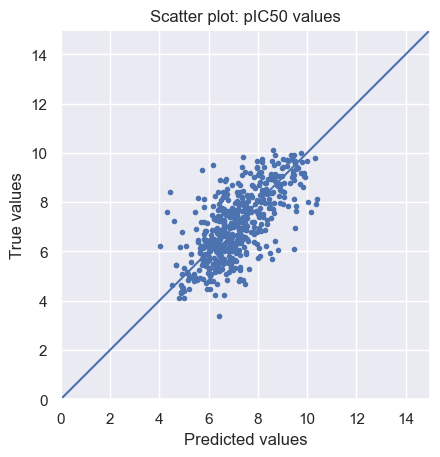

In [19]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, marker=".")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot: pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)
plt.show()

如您所见，预测值与真实值之间存在正线性关系，但拟合程度远非完美。

预测外部/未标记数据
我们使用训练好的神经网络预测来自 test.csv 文件的无标签化合物的 pIC50 值。

## 这一块是重点，需要用到之前训练好的模型，所以需要先加载模型
## 这一块主要是用作，自己设计的smiles字符串预测pIC50值

In [22]:
# Load external/unlabeled data set
external_data = pd.read_csv(DATA / "test.csv")
external_data = external_data.reset_index(drop=True)
external_data.head()

,smiles,original pIC50
0,C=CC(C)(C)c1cc(C(=O)c2c(-c3cc(-c4cc5cc(C(C)(C)...,8.221849
1,C[C@H]1[C@H](C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[...,7.508638
2,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,7.259637
3,COc1ccc([C@@]23Oc4cc(OC)cc(OC)c4[C@]2(O)[C@H](...,7.096910
4,COc1ccc(/C=C/C(=O)c2nnn(-c3ccc(Cl)cc3)c2C)cc1OC,6.872895


我们使用相同的 smiles_to_fp 函数，将 SMILES 字符串转换为 MACCS 指纹。



In [23]:
# Convert SMILES strings to MACCS fingerprints
external_data["fingerprints_df"] = external_data["smiles"].apply(smiles_to_fp)

# Look at head
print("Shape of dataframe : ", external_data.shape)
external_data.head(3)

Shape of dataframe :  (93, 3)


,smiles,original pIC50,fingerprints_df
0,C=CC(C)(C)c1cc(C(=O)c2c(-c3cc(-c4cc5cc(C(C)(C)...,8.221849,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,C[C@H]1[C@H](C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[...,7.508638,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,7.259637,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


注意：为确保结果的可重复性，我们将一个模型保存为 ANN_model.hdf5 ，其结构与上述相同。尽管模型相同，但由于随机梯度算法中的随机性，从一次模拟到另一次模拟保存的权重可能不同。我们使用 load_model()函数加载 ANN 模型权重。

In [36]:
# Load model
model = load_model(DATA / "ANN_model.hdf5", compile=False)

In [37]:
model

In [38]:
# Prediction on external/unlabeled data
predictions = model.predict(
    np.array(list((external_data["fingerprints_df"]))).astype(float), callbacks=callbacks_list
)

predicted_pIC50 = pd.DataFrame(predictions, columns=["predicted_pIC50"])
predicted_pIC50_df = external_data.join(predicted_pIC50)

predicted_pIC50_df.head(3)

3/3 [==============================] - 0s 1ms/step


,smiles,original pIC50,fingerprints_df,predicted_pIC50
0,C=CC(C)(C)c1cc(C(=O)c2c(-c3cc(-c4cc5cc(C(C)(C)...,8.221849,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.009878
1,C[C@H]1[C@H](C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[...,7.508638,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.305697
2,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,7.259637,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.477018


In [39]:
# Save the predicted values in a csv file in the data folder
predicted_pIC50_df.to_csv(DATA / "predicted_pIC50_df.csv")

选择前 3 个化合物 ¶
我们选择预测 pIC50 值最高的 3 个化合物，这些化合物可以作为潜在的  抑制剂进一步研究。



In [40]:
# Select top 3 drugs
predicted_pIC50_df = pd.read_csv(DATA / "predicted_pIC50_df.csv", index_col=0)
top3_drug = predicted_pIC50_df.nlargest(3, "predicted_pIC50")
top3_drug

,smiles,original pIC50,fingerprints_df,predicted_pIC50
0,C=CC(C)(C)c1cc(C(=O)c2c(-c3cc(-c4cc5cc(C(C)(C)...,8.221849,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,8.009878
2,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,7.259637,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,7.477018
67,COc1cc(/C=C/C(=O)c2ccc(N)c(-c3ccc(F)cc3)c2)ccc1O,5.165579,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,7.158886


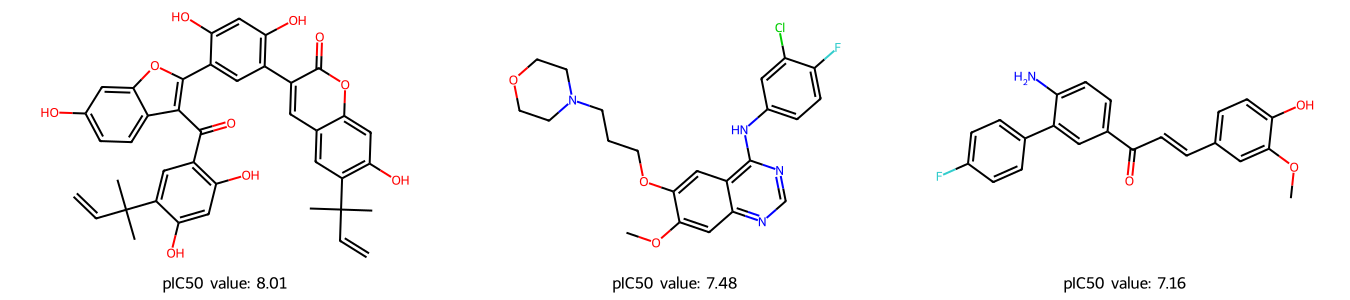

In [42]:
# Draw the drug molecules
highest_pIC50 = predicted_pIC50_df["smiles"][top3_drug.index]

mols_EGFR = [Chem.MolFromSmiles(smile) for smile in highest_pIC50]
pIC50_EGFR = top3_drug["predicted_pIC50"].tolist()
pIC50_values = [(f"pIC50 value: {value:.2f}") for value in pIC50_EGFR]

Draw.MolsToGridImage(mols_EGFR, molsPerRow=3, subImgSize=(450, 300), legends=pIC50_values)